In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.io import readsav
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
file_dict = {'Malin 2': 'Malin2profile.sav',
            'UGC 6614': 'UGC06614profile.sav'}



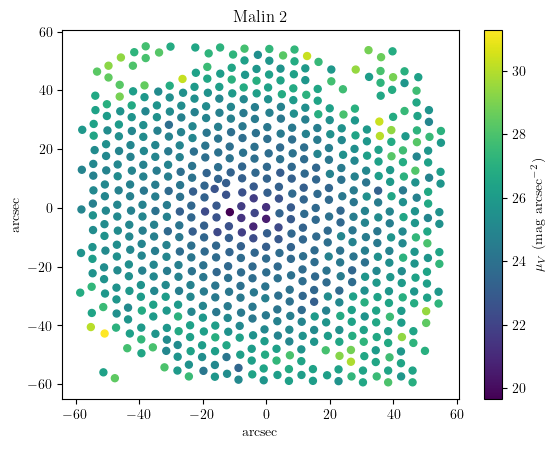

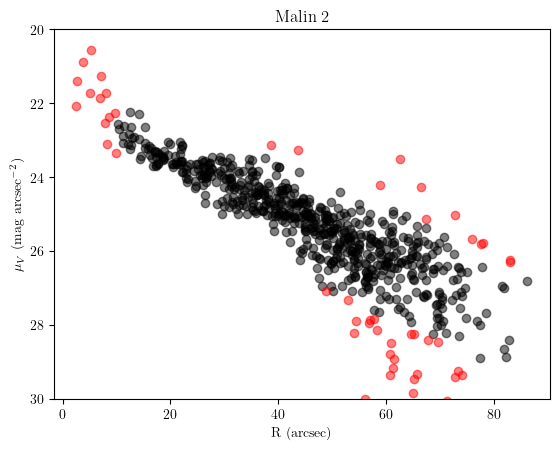

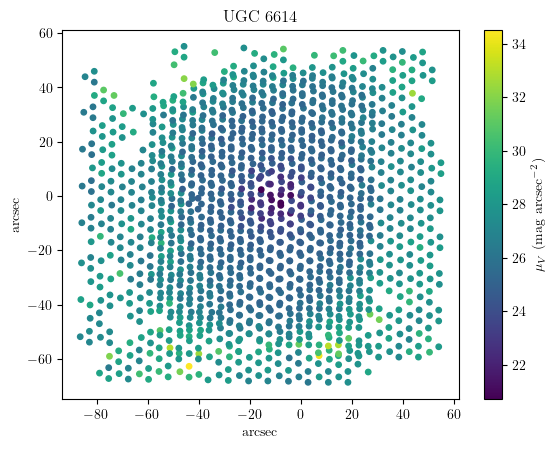

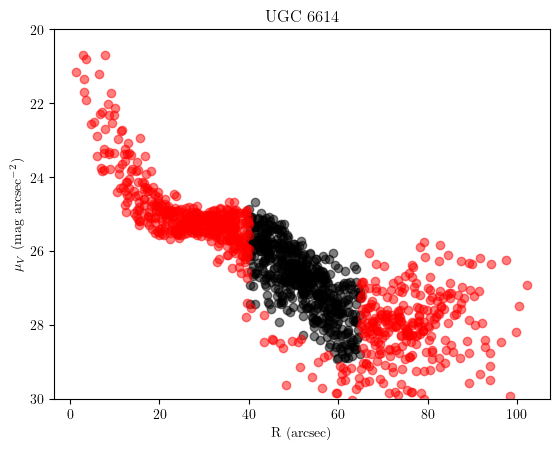

In [3]:
symsizes = {'Malin 2': 25, 'UGC 6614': 15}
ylims = {'Malin 2': [30,20], 'UGC 6614': [30,20]}
for key in file_dict:
    fig, ax1 = plt.subplots()
    f3 = readsav(file_dict[key])
    sp = ax1.scatter(f3['x'], f3['y'], c=f3['mu'], s=symsizes[key])
    cb = fig.colorbar(sp, ax=ax1)
    cb.set_label(r'$\mu_V$ (mag arcsec$^{-2}$)')
    ax1.set_xlabel('arcsec')
    ax1.set_ylabel('arcsec')
    ax1.set_title(key)
    
    fig, ax1 = plt.subplots()
    good = f3['good']
    ax1.plot(f3['r'][good], f3['mu'][good], 'ko', alpha=0.5)
    clipped = f3['clipped']
    ax1.plot(f3['r'][clipped], f3['mu'][clipped], 'ro', alpha=0.5)
    ax1.set_title(key)
    ax1.set_xlabel('R (arcsec)')
    ax1.set_ylabel(r'$\mu_V$ (mag arcsec$^{-2}$)')
    ax1.set_ylim(ylims[key])
    
    # save the figures

In [4]:
file_dict2 = {'Malin 2': 'Malin2.sav',
            'UGC 6614': 'UGC06614.sav'}



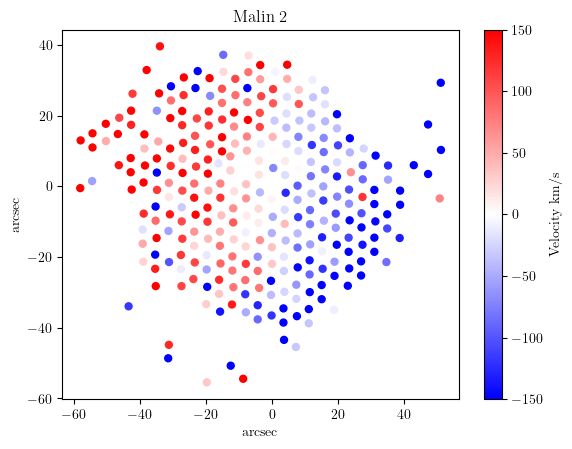

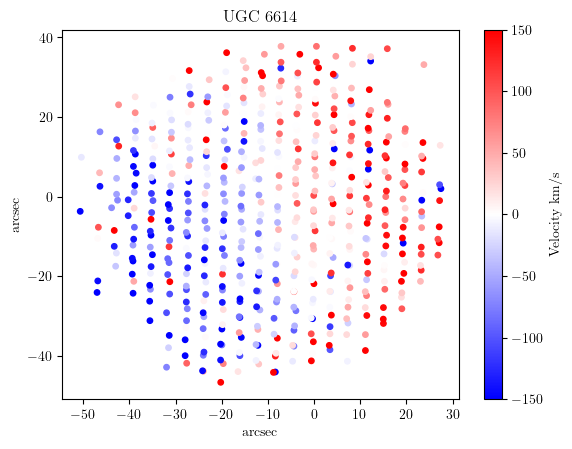

In [5]:
for key in file_dict:
    f1 = readsav(file_dict2[key])
    f3 = readsav(file_dict[key])
    fig, ax1 = plt.subplots()
    
    good = np.where((f1['s_sols'][1,:] != 0) & (f3['x'] > -60))[0]
    
    med_v = np.median(f1['s_sols'][0,good])
    
    sp = ax1.scatter(f3['x'][good], f3['y'][good], c=f1['s_sols'][0,good]-med_v, s=symsizes[key],
               vmin=-150, vmax=150, cmap='bwr')
    
    cb = fig.colorbar(sp, ax=ax1)
    cb.set_label(r'Velocity km/s')
    ax1.set_xlabel('arcsec')
    ax1.set_ylabel('arcsec')
    ax1.set_title(key)
    

In [6]:
# looks like there are some fits files somewhere 
rbins=[0.,5.,10.,20.,30.,40.,60.] # from fitandbin.pro